# Creating Models to Predict Customer Churn
## The process to create a predictive model is as follows...
### - Aquire the Data
- Access the database from SQL and store into a pandas dataframe
- Split the data into train, test, and validate

### - Explore the Data
- Identify Predictor Variables (X) and Target Variable (y)
- Univariate Analysis (one variable)
    - For continuous variables, what is the central tendency/range and are there any outliers/missing values?
    - For discrete variables, how are they distributed?
- Bivariate Analysis (more than one variable)
    - Using hypothesis testing, are there any variables with a strong relationship?
    
### - Prep the Data (stored in prepare.py or done in notebook)
- Deal with outliers and missing values identified earlier
- Create columns for new features, such as dummy variables or derived variables

### -  Split the Data
#### Train
- Create models using different types (logistic regression, decision tree, etc.)
- Adjust parameters of each model
- Identify top 3 models used on train data

#### Validate
- Determine if the models created on train overfit to the data
- Determine the top 1 model

#### Test
- Test only on the best model

### - Explore the Data
- Identify Predictor Variables (X) and Target Variable (y)
- Univariate Analysis (one variable)
    - For continuous variables, what is the central tendency/range and are there any outliers/missing values?
    - For discrete variables, how are they distributed?
- Bivariate Analysis (more than one variable)
    - Using hypothesis testing, are there any variables with a strong relationship?

In [1]:
# python files that contain the functions to aquire and prep the data
import acquire
import prepare

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# importing functions to create the various models
# this project will use classification machine learning:
# Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# importing functions to access model metrics, such as accuracy and the confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Imports complete.')

Imports complete.


In [2]:
# aquiring data and using head to check everything is good
df = acquire.get_churn_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,Mailed check,DSL
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,Credit card (automatic),DSL
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,Electronic check,DSL
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,Electronic check,DSL
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,Bank transfer (automatic),DSL


In [3]:
# prep the data with the Prepare file
df = prepare.prep_telco_df(df)

No duplicates found.
Dummy variables for gender created as "male".
Yes/No column values changed to boolean, 0 as no and 1 as yes
Added feature for tenure in years.
Converted total_charges to float for easier manipulation.
Data prep complete.


In [4]:
train, test, validate = prepare.train_test_validate(df)

train shape:  (5070, 25) , validate shape:  (1268, 25) , test shape:  (705, 25)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


# Explore data to determine if more prep is needed

In [14]:
train.head(3).T

,855,2823,5656
customer_id,6923-EFPNL,2004-OCQXK,2542-HYGIQ
senior_citizen,0,0,0
partner,0,0,0
dependents,0,0,0
tenure_months,4,1,1
phone_service,1,1,1
multiple_lines,Yes,No,No
internet_service_type_id,1,2,3
online_security,No,No,No internet service
online_backup,No,No,No internet service


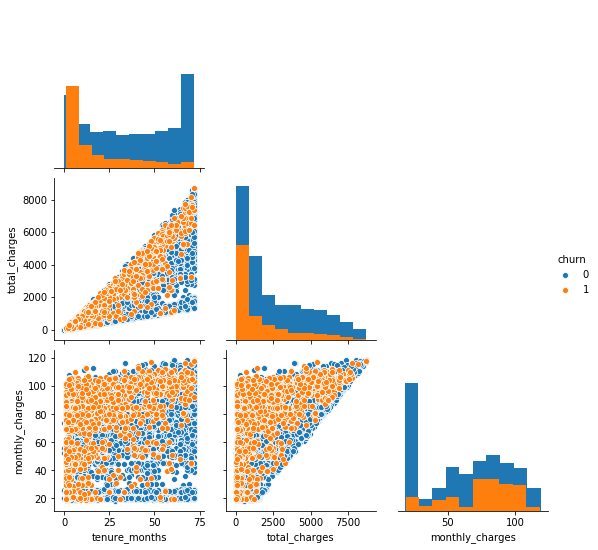

In [32]:
explore_df = train[['tenure_months','total_charges','monthly_charges','churn']]
sns.pairplot(explore_df,corner=True,hue='churn',diag_kind='hist')